# Zadania Lista 2

**Wymagania**

- Jupyter'a  należy uruchomić korzystając ze środowiska w kontenerze Docker, w przeciwnym razie przyznane będzie 0pkt za listę. (To wymaganie zostanie z nami do końca kursu.)

#### 1. (5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b) i c) z wykorzystaniem bibliotek `numpy` i `matplotlib`

a) **(2.5 pkt)** Poniżej przedstawiono implementację funkcji `calculate`, w której zrealizowano zbiór operacji na dwóch dwuwymiarowych macierzach $a$ i $b$. Zmień implementację tej funkcji tak, aby pozbyć się wykorzystania pętli - w tym celu wykorzystaj operacje zdefiniowane w bibliotece `numpy`. Zweryfikuj poprawność nowo zdefiowanej funkcji dla dowolnie wybranego zestawu parametrów

```python
def calculate(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
'''Implements bunch of operations on matrices.'''
    # Check a and b dimensions
    assert a.shape == b.shape
    # Check whether array is 2D 
    assert len(a.shape) == 2

    rows = a.shape[0]
    cols = a.shape[1]
    b_sum = 0
    out = 0.0
    c = np.zeros(a.shape)

    for row_id in range(rows):
        for col_id in range(cols):
            if a[row_id][col_id] > threshold:
                c[row_id][col_id] = abs(
                    a[row_id][col_id] - b[row_id][col_id]
                )
            else:
                c[row_id][col_id] = 1

            b_sum += b[row_id][col_id]


    row_avgs = []
    for row_id in range(rows):
        row_sum = 0
        for row_id in range(cols):
            row_sum += c[row_id][col_id]

        row_avg = row_sum / cols
        out += (row_avg * 100) / b_sum  

    return out
```


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import timeit

In [2]:
def calculate_old(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
    '''Implements bunch of operations on matrices.'''
    # Check a and b dimensions
    assert a.shape == b.shape
    # Check whether array is 2D 
    assert len(a.shape) == 2

    rows = a.shape[0]
    cols = a.shape[1]
    b_sum = 0
    out = 0.0
    c = np.zeros(a.shape)

    for row_id in range(rows):
        for col_id in range(cols):
            if a[row_id][col_id] > threshold:
                c[row_id][col_id] = abs(
                    a[row_id][col_id] - b[row_id][col_id]
                )
            else:
                c[row_id][col_id] = 1

            b_sum += b[row_id][col_id]


    row_avgs = []
    for row_id in range(rows):
        row_sum = 0
        for row_id in range(cols):
            row_sum += c[row_id][col_id]

        row_avg = row_sum / cols
        out += (row_avg * 100) / b_sum  

    return out

In [4]:
def calculate(a: np.ndarray, b: np.ndarray, threshold: int = 5) -> float:
    # Check a and b dimensions
    assert a.shape == b.shape
    # Check whether array is 2D
    assert len(a.shape) == 2

    c = np.where(a > threshold, abs(a - b), 1)
    b_sum = np.sum(b)
    row_avgs = np.mean(c, axis=1)
    row_avgs *= 100 / b_sum
    out = np.sum(row_avgs)

    return out

b) **(1 pkt)** Dokonaj porównania czasów wykonania funkcji `calculate` i tej zaimplementowanej w punkcie 1. Wylosuj macierze wejściowe $a$ i $b$ z rozkładu dyskretnego jednostajnego z zakresu 0-10 oraz przyjmij wartość parametru `threshold` na 5. Obliczenia przeprowadź dla następujących wymiarów macierzy:
\
\
W celu mierzenia czasu można użyć komendy %timeit,
https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit

In [5]:
dims = [(3, 3), (100, 100), (1000, 1000), (10000, 10000)]
threshold = 5

old_times = []
new_times = []
speedups = []
for dim in dims:
    a = np.random.randint(0, 11, size=dim)
    b = np.random.randint(0, 11, size=dim)
    
    print(f"Dimensions: {dim}")
    t1 = %timeit -o -r 1 calculate_old(a, b, threshold)
    t2 = %timeit -o -r 1 calculate(a, b, threshold)
    old_times.append(t1)
    new_times.append(t2)
    speedups.append(t1.best / t2.best)

Dimensions: (3, 3)
14.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
21.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
Dimensions: (100, 100)
12.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
69.3 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
Dimensions: (1000, 1000)
1.15 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
Dimensions: (10000, 10000)
2min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
985 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


c) **(1.5 pkt)** Wykorzystując bibliotekę `matplotlib` narysuj wykres przyśpieszenia nowo zaimplementowanej funkcji w porównaniu do oryginalnej implementacji. Dobierz odpowiedni typ wykresu, podpisz etykiety osi i uzupełnij tytuł wykresu.

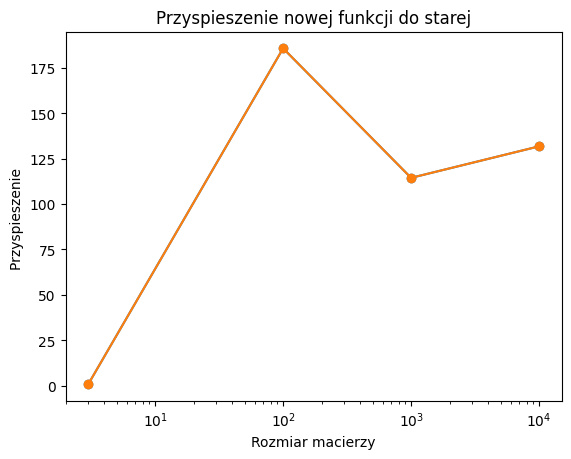

In [6]:
plt.plot(dims, speedups, marker='o')
plt.xscale('log')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Przyspieszenie ')
plt.title('Przyspieszenie nowej funkcji do starej')
plt.show()

#### 2. (5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b), c) i d) z wykorzystaniem bibliotek `pandas`, `matplotlib` i `sklearn`

a) **(0.25 pkt)** Używając biblioteki `sklearn` i poniższej definicji wczytaj zbiór danych `boston house-prices dataset` i przekształć go do postaci `DataFrame` z biblioteki `pandas`. Dodatkowo wyświetl 15 pierwszych rekordów.

```python
from sklearn.datasets import load_boston
dataset = load_boston()
```

In [7]:
boston_dataset = load_boston()

boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['PRICE'] = boston_dataset.target

print(boston_df.head(15))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

b) **(0.75 pkt)** Używając funkcji `apply` utwórz kolumnę $\text{HIGH_TAX}$, która sprawdza czy dla danego rekordu stawka podatkowa (kolumna $\text{TAX}$)  jest większa od mediany stawki podatkowej wszystkich rekordów

In [8]:
median_tax = boston_df['TAX'].median()
print(median_tax)
boston_df['HIGH_TAX'] = boston_df['TAX'].apply(lambda x: x > median_tax)

330.0


c) **(1.5 pkt)** Pogrupuj rekordy wg. kolumny $\text{HIGH_TAX}$ i wybierz 4 cechy ze zbioru danych w których najbardziej widać różnicę dla grup $\text{HIGH_TAX}$



In [9]:
grouped = boston_df.groupby('HIGH_TAX')
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
diff = abs(grouped[features].mean().diff())
selected_features = diff.mean(axis=0).nlargest(4).index.tolist()


print(selected_features)

['TAX', 'B', 'AGE', 'RAD']


d) **(2.5 pkt)** Dla wybranych cech w punkcie `c)` porównaj wartości tych cech na wykresach. Dobierz odpowiedni typ wykresu (słupkowy, kołowy, liniowy, histogram). Wybór uzasadnij. Wykresy mają być umiejscowione w jednym wykresie z subplotem składającym się z 2 kolumn i dwóch rzędów. Wykresy powinny posiadać etykiety osi X i Y oraz legendę.


 Wykres słupkowy jest dobrym wyborem, gdy porównuje się wartości kategoryczne.\
 Wykres liniowy jest dobrym wyborem do porównywania trendów w danych ciągłych.\
 Histogram jest dobrym wyborem do przedstawiania rozkładu wartości cech.\
 Wykres kołowy jest dobrym wyborem, gdy chcemy pokazać udział procentowy poszczególnych kategorii.\

 W tym przypadku mamy tylko 2 kategorie HIGH_TAX = True lub HIGH_TAX = False.\
 Dlatego potencjalne wybory to wykres słupkowy lub kołowy.\
 Moją osobistą preferencją jest wykres słupkowy bo wydaje się być bardziej przejrzysty.

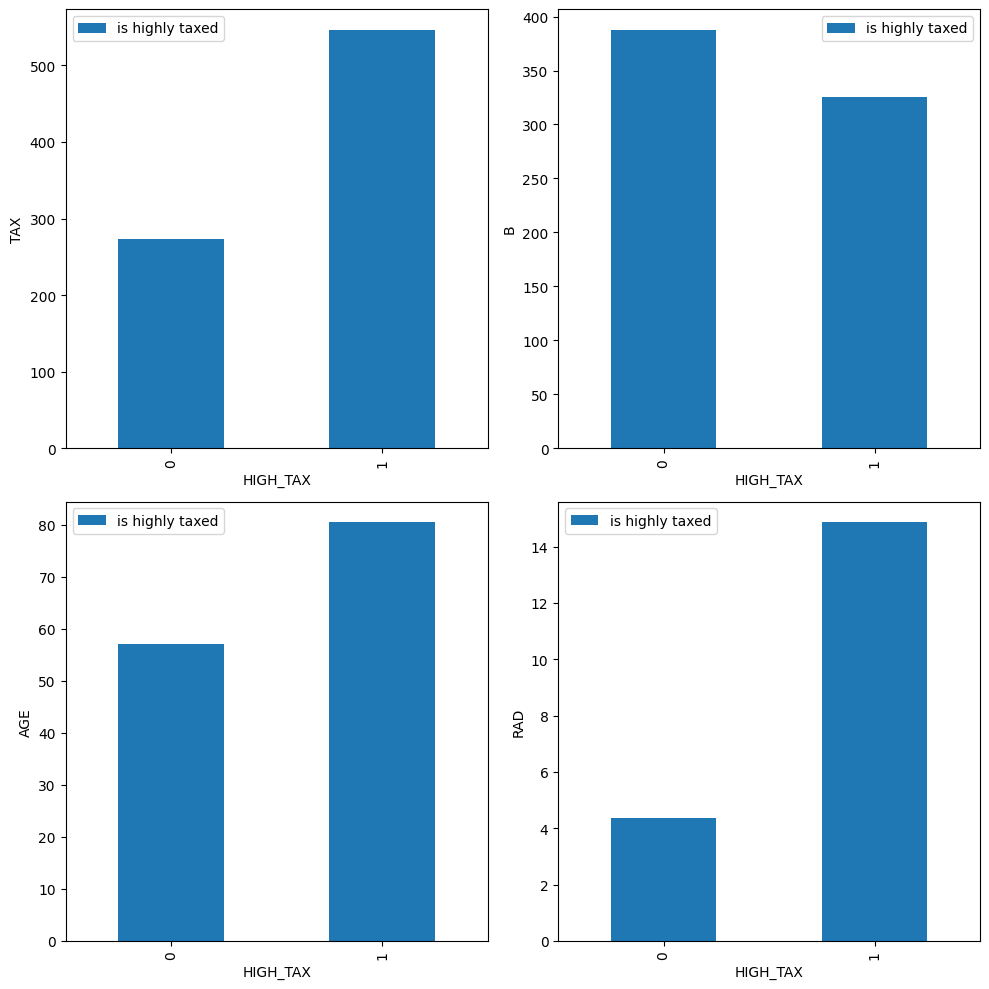

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    grouped[feature].mean().reset_index().plot(kind='bar', ax=ax)
    ax.set_xlabel('HIGH_TAX')
    ax.set_ylabel(feature)
    ax.legend(['is highly taxed'])
    
plt.tight_layout()
plt.show()

#### [OPCJONALNE] 3. (1.5 pkt) Zapoznaj się z biblioteką [seaborn](https://seaborn.pydata.org/index.html) i zmień wykresy z punktu 2 d) na używające tej biblioteki

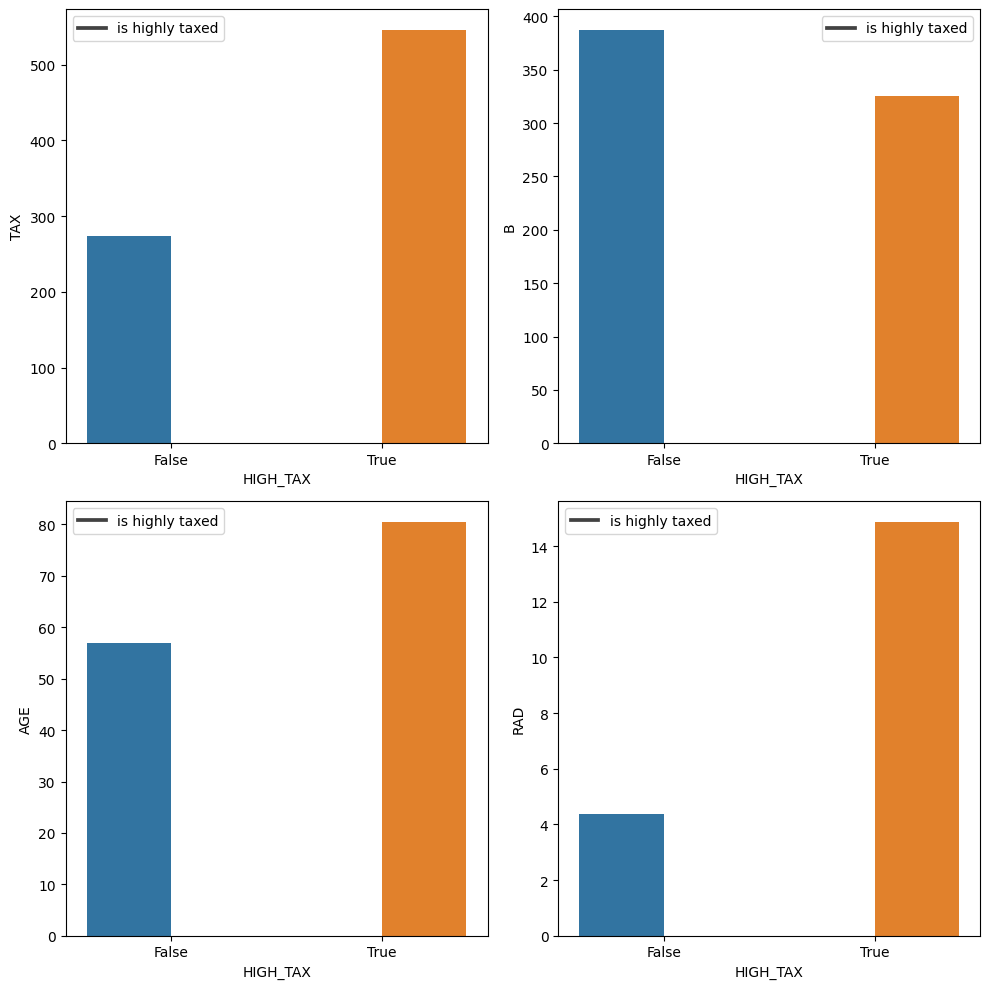

In [11]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(x='HIGH_TAX', y=feature, hue='HIGH_TAX', data=grouped.mean().reset_index(), ax=ax)
    ax.set_xlabel('HIGH_TAX')
    ax.set_ylabel(feature)
    ax.legend(['is highly taxed'])
    
plt.tight_layout()
plt.show()
